<a href="https://colab.research.google.com/github/HassanRizvi-Nedian/TCN_On_Timeseries_turkey_wind_farm/blob/main/EEMD_IMFS_AS_FEATURE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!git clone https://github.com/alphaameer007/RHM_FYP

In [4]:
!pip install keras-tcn --no-dependencies

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
!pip install EMD-signal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 13.6 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0


In [5]:
from tcn import TCN
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from PyEMD import EEMD 

In [14]:
df

,Unnamed: 0,IMF0,IMF1,IMF2,IMF3,IMF4,IMF5,IMF6,IMF7,IMF8,IMF9,10,11,12,13,14,15,16,17,original
0,0,0.000536,0.002921,-0.000149,0.000452,-0.012205,-0.096512,-0.023046,0.083425,-0.173759,-0.459796,-0.228755,0.075691,0.147574,0.006002,0.031005,0.041962,-0.192969,-0.249461,-0.788734
1,1,0.033105,0.002734,-0.000080,-0.000326,-0.016634,-0.101415,-0.017367,0.084531,-0.175387,-0.462178,-0.229128,0.076075,0.147695,0.006000,0.031004,0.041966,-0.192969,-0.249462,-0.748017
2,2,-0.045613,-0.003662,0.003815,-0.003069,-0.018934,-0.105507,-0.010981,0.085718,-0.177073,-0.464415,-0.229459,0.076464,0.147815,0.005997,0.031003,0.041970,-0.192969,-0.249462,-0.829422
3,3,0.022178,-0.003742,0.009522,-0.006956,-0.019245,-0.108689,-0.003909,0.086985,-0.178819,-0.466504,-0.229748,0.076858,0.147934,0.005995,0.031001,0.041974,-0.192969,-0.249462,-0.766864
4,4,0.008723,-0.000983,0.012725,-0.011066,-0.017877,-0.110845,0.003815,0.088331,-0.180624,-0.468442,-0.229993,0.077258,0.148053,0.005992,0.031000,0.041978,-0.192969,-0.249463,-0.788401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52555,52555,0.157685,-0.000954,-0.040724,-0.040293,0.023074,0.109357,0.128608,0.161303,0.204639,0.205606,0.198295,-0.042351,-0.082755,-0.163522,0.003823,0.026899,-0.236107,-0.273427,0.638379
52556,52556,-0.198461,-0.207577,-0.134789,-0.096418,0.008972,0.107676,0.128219,0.162162,0.205670,0.207728,0.201076,-0.041219,-0.082401,-0.163474,0.003827,0.026896,-0.236107,-0.273427,-0.068363
52557,52557,0.130720,-0.159829,-0.167297,-0.128017,-0.001078,0.104934,0.126368,0.161680,0.205970,0.209613,0.203806,-0.040097,-0.082048,-0.163425,0.003831,0.026893,-0.236107,-0.273428,0.217042
52558,52558,0.058125,0.046537,-0.135348,-0.124669,-0.005323,0.101143,0.123121,0.159844,0.205531,0.211258,0.206483,-0.038986,-0.081697,-0.163377,0.003835,0.026890,-0.236107,-0.273428,0.390789


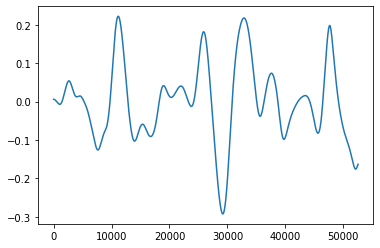

In [21]:
df=pd.read_csv('D__FYP_FINAL_TURKEY_IMFs.csv')
plt.plot(df['13'])

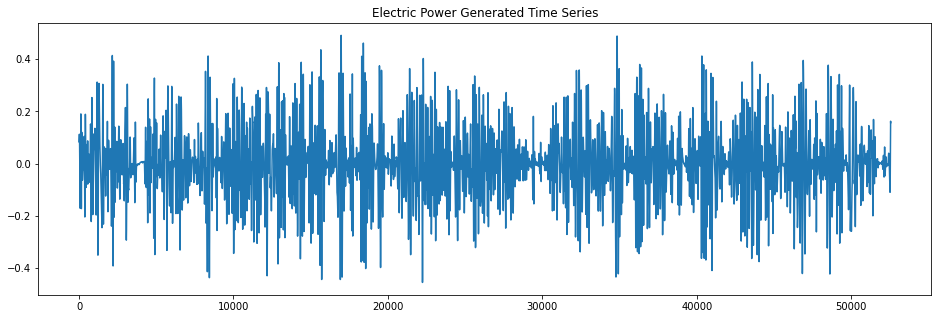

In [22]:
df=pd.read_csv('D__FYP_FINAL_TURKEY_IMFs.csv')
#df=pd.read_csv('/content/RHM_FYP/TurkeyWindFarm.csv')
df=df['IMF7']
data = df.to_numpy()
plt.figure(figsize=(16,5))
plt.plot(data)
plt.title("Electric Power Generated Time Series")
plt.show()

In [23]:
scaler = MinMaxScaler(feature_range = (-1,1)) 
scaled_data = scaler.fit_transform(data.reshape(-1,1))
scaled_data.shape
scaled_data = np.squeeze(scaled_data)
scaled_data.shape

(52560,)

In [24]:
in_sample = scaled_data
in_sample = in_sample.reshape(-1,1)
in_sample.shape

(52560, 1)

In [25]:
eemd = EEMD()
eemd.extrema_detection = "simple"
t = np.linspace(0, in_sample.shape[0], in_sample.shape[0])
t = t.reshape(-1,1)
print(t.shape, in_sample.shape)
t = np.squeeze(t)
in_sample = np.squeeze(in_sample)

(52560, 1) (52560, 1)


In [26]:
imfs = eemd(in_sample, t)
imfs1,residual = eemd.get_imfs_and_residue()

print(imfs1.shape)
plt.plot(residual)

KeyboardInterrupt: ignored

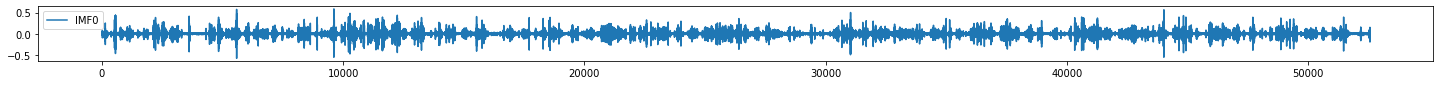

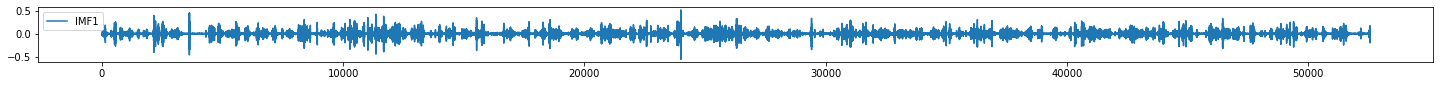

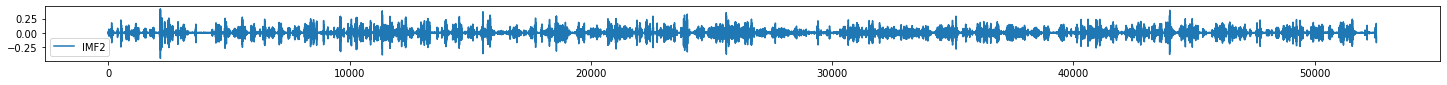

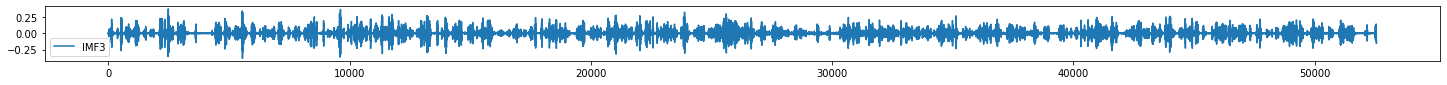

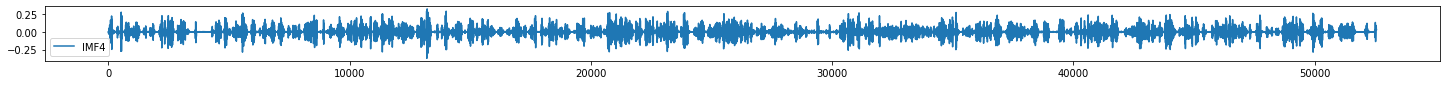

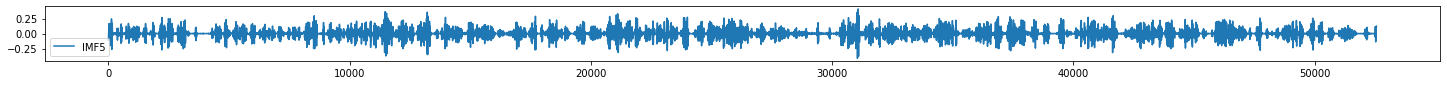

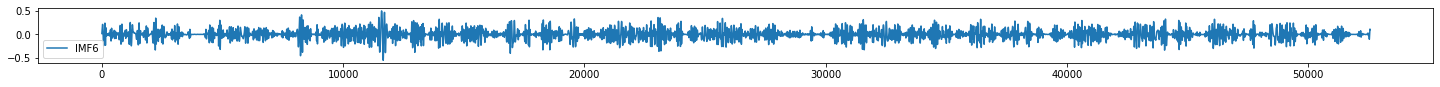

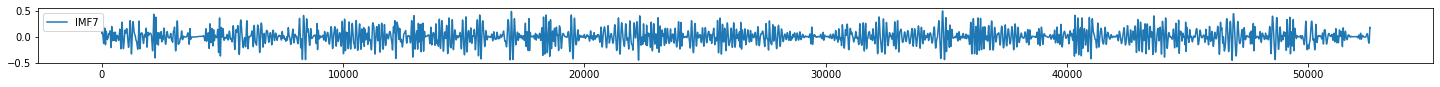

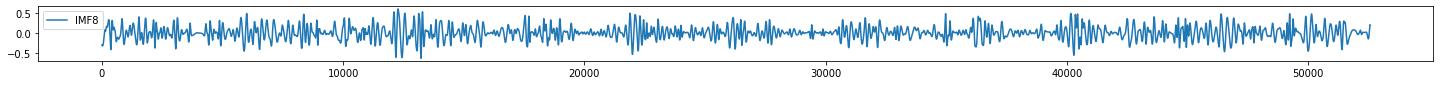

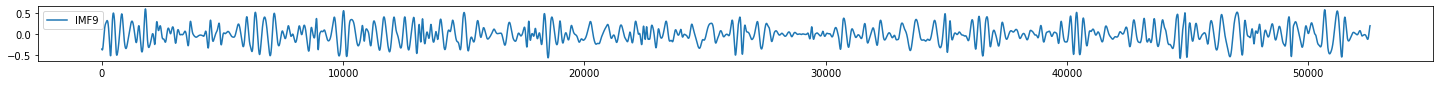

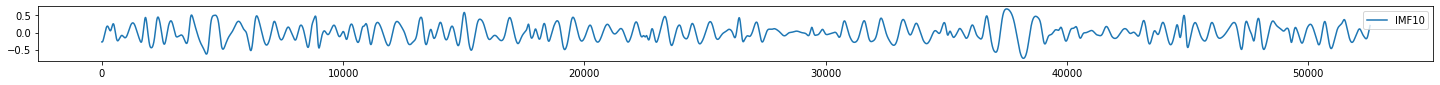

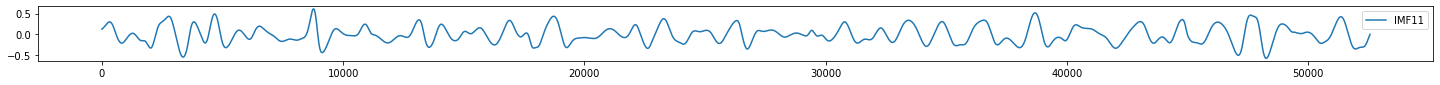

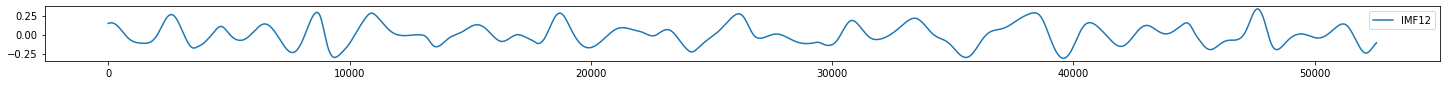

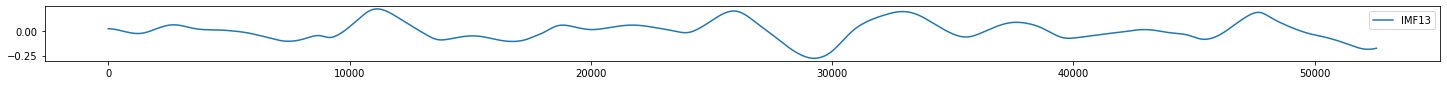

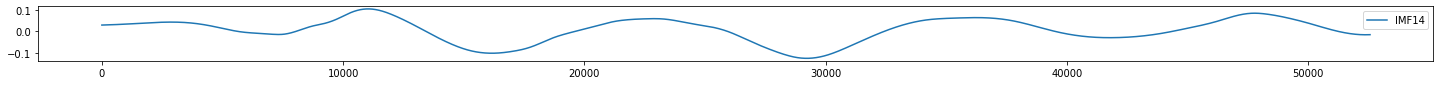

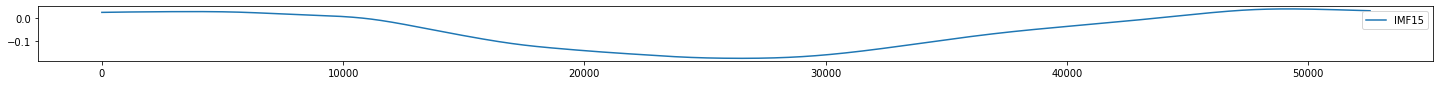

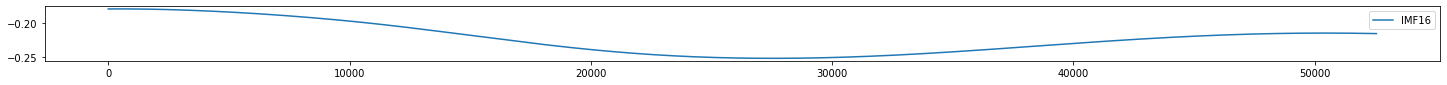

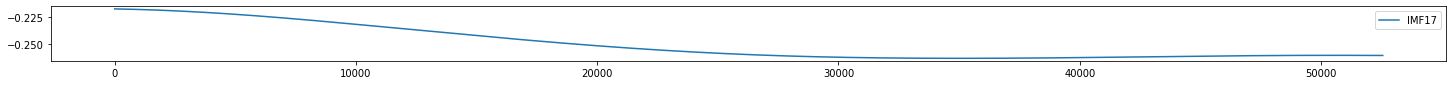

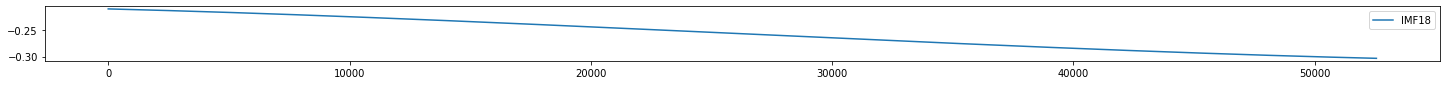

In [ ]:
for i in range(len(imfs1)):
  fig, ax = plt.subplots(figsize=(25,1))
  fig = plt.plot(imfs1[i], label = "IMF{}".format(i))
  plt.legend()
  plt.show()

In [ ]:
def series_to_supervised(data, n_in, n_out, dropnan=True):

	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
     

In [ ]:
in_sample = in_sample.reshape(-1,1); print(in_sample.shape)

(52560, 1)


In [ ]:

imfs1.shape
imfs1 = np.transpose(imfs1, (1,0)); 
imfs1.shape

(52560, 19)

In [ ]:
data_eemd = pd.DataFrame(imfs1)
data_eemd

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.003712,-0.003127,0.001382,-0.004276,0.000424,-0.103590,0.017976,0.063253,-0.306282,-0.360236,-0.273554,0.126603,0.146694,0.022126,0.030293,0.024492,-0.179604,-0.216961,-0.209321
1,0.027111,0.004561,0.005865,-0.009413,-0.002303,-0.108737,0.022734,0.066226,-0.307772,-0.362592,-0.274000,0.127010,0.146823,0.022120,0.030296,0.024494,-0.179604,-0.216962,-0.209322
2,-0.032812,-0.003641,0.012908,-0.012613,-0.005543,-0.112193,0.027910,0.069148,-0.309210,-0.364824,-0.274399,0.127421,0.146952,0.022113,0.030299,0.024496,-0.179604,-0.216962,-0.209324
3,0.024480,-0.009128,0.018494,-0.014082,-0.008608,-0.114121,0.033536,0.072004,-0.310594,-0.366931,-0.274749,0.127836,0.147079,0.022107,0.030302,0.024498,-0.179604,-0.216962,-0.209325
4,-0.015735,-0.000087,0.018471,-0.014294,-0.010721,-0.114713,0.039633,0.074783,-0.311923,-0.368910,-0.275050,0.128255,0.147205,0.022100,0.030305,0.024500,-0.179603,-0.216963,-0.209326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52555,0.152699,-0.015171,-0.031897,-0.052274,0.045613,0.126806,0.113497,0.176670,0.199379,0.196596,0.193263,-0.003373,-0.108644,-0.175678,-0.015161,0.031652,-0.215827,-0.260594,-0.303204
52556,-0.192768,-0.198993,-0.132762,-0.115540,0.035470,0.126915,0.112364,0.177696,0.200438,0.198167,0.195770,-0.002133,-0.108306,-0.175621,-0.015157,0.031649,-0.215828,-0.260594,-0.303206
52557,0.121054,-0.144167,-0.174368,-0.153962,0.028158,0.125405,0.110025,0.177347,0.200840,0.199520,0.198225,-0.000902,-0.107969,-0.175563,-0.015152,0.031646,-0.215829,-0.260594,-0.303207
52558,0.069336,0.045050,-0.147409,-0.155153,0.024953,0.122120,0.106585,0.175612,0.200577,0.200652,0.200626,0.000318,-0.107633,-0.175505,-0.015147,0.031643,-0.215829,-0.260594,-0.303208


In [28]:
in_sample = pd.DataFrame(in_sample)
in_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       52560 non-null  float64
dtypes: float64(1)
memory usage: 410.8 KB


In [29]:
in_sample

,0
0,0.138552
1,0.140889
2,0.143397
3,0.146075
4,0.148921
...,...
52555,0.303162
52556,0.304977
52557,0.303959
52558,0.300076


In [30]:
final_data = pd.concat([df,in_sample],axis=1)
final_data

,IMF7,0
0,0.083425,0.138552
1,0.084531,0.140889
2,0.085718,0.143397
3,0.086985,0.146075
4,0.088331,0.148921
...,...,...
52555,0.161303,0.303162
52556,0.162162,0.304977
52557,0.161680,0.303959
52558,0.159844,0.300076


In [ ]:
final_data.shape

(52560, 20)

In [31]:
# Calculate the number of readings per day
readings_per_day = 144

#n = number of day
n = 5

# Calculate the sequence length (n days in readings)
sequence_length = readings_per_day * n

# Set the lookback window to be the same as the sequence length
lookback_window = sequence_length

# Convert the data to a NumPy array
final_data = final_data.values

x, y = [], []
for i in range(lookback_window, len(final_data)):
    x.append(final_data[i - lookback_window:i, :])
    y.append(final_data[i, -1])
x = np.array(x)
y = np.array(y)

In [32]:
print(x.shape)
print(y.shape)

(51840, 720, 2)
(51840,)


In [ ]:
in_sample

,0
0,-0.788734
1,-0.748017
2,-0.829422
3,-0.766864
4,-0.788401
...,...
52555,0.638379
52556,-0.068363
52557,0.217042
52558,0.390789


In [ ]:
y[51839]

0.5591152685381648

In [33]:
# Calculate the number of test samples (last 3 days of the year)
num_test_samples = 720

# Split the data into training and test sets
x_train = x[:-num_test_samples]
y_train = y[:-num_test_samples]
x_test = x[-num_test_samples:]
y_test = y[-num_test_samples:]

In [ ]:
model = keras.models.Sequential([
    TCN(input_shape=(lookback_window, 2), 
        kernel_size=10,
        nb_filters=32,
        dilations=[1, 2, 4, 8, 16],
        padding='causal',
        activation='relu',
        return_sequences=False,
        nb_stacks=2,
        use_skip_connections=False,
        use_batch_norm=False
        ),
    keras.layers.Dense(1)
])
model.summary()
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_mean_absolute_percentage_error",
   patience=15,
    start_from_epoch=15,
    restore_best_weights=True,
    mode="min"
)
model.compile('adam','mae',metrics=keras.metrics.MeanAbsolutePercentageError())
print('Train...')
history = model.fit(x_train, y_train,
                    epochs=50,
                    verbose=1,validation_data=(x_test,y_test),callbacks=[early_stopping])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tcn_1 (TCN)                 (None, 32)                195936    
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 195,969
Trainable params: 195,969
Non-trainable params: 0
_________________________________________________________________
Train...
Epoch 1/50
1598/1598 [==============================] - 1987s 1s/step - loss: 0.0746 - mean_absolute_percentage_error: 290.5718 - val_loss: 0.0044 - val_mean_absolute_percentage_error: 16.7428
Epoch 2/50
1598/1598 [==============================] - 1961s 1s/step - loss: 0.0116 - mean_absolute_percentage_error: 35.7083 - val_loss: 0.0021 - val_mean_absolute_percentage_error: 8.3661
Epoch 3/50
1598/1598 [=============================